In [1]:
import datetime
import matplotlib.pyplot as plt

from sunpy.net import Fido, attrs as a
from sunpy.timeseries import TimeSeries

In [2]:
tr = a.Time("2017-09-04 00:00:00.000", "2017-09-08 00:00:00.000")
result = Fido.search(tr,
                     a.hek.FL,
                     a.hek.FL.GOESCls > "M1.0",
                     a.hek.OBS.Observatory == "GOES")

In [3]:
results = result["hek"]["event_starttime", "event_peaktime",
                             "event_endtime", "fl_goescls", "ar_noaanum"]
results

event_starttime,event_peaktime,event_endtime,fl_goescls,ar_noaanum
Time,Time,Time,str4,int64
2017-09-04 05:36:00.000,2017-09-04 05:49:00.000,2017-09-04 06:05:00.000,M1.2,12673
2017-09-04 15:11:00.000,2017-09-04 15:30:00.000,2017-09-04 15:33:00.000,M1.5,12673
2017-09-04 18:46:00.000,2017-09-04 19:37:00.000,2017-09-04 19:52:00.000,M1.7,12673
2017-09-04 19:59:00.000,2017-09-04 20:02:00.000,2017-09-04 20:06:00.000,M1.5,12673
2017-09-04 20:28:00.000,2017-09-04 20:33:00.000,2017-09-04 20:37:00.000,M5.5,12673
2017-09-04 22:10:00.000,2017-09-04 22:14:00.000,2017-09-04 22:19:00.000,M2.1,12673
2017-09-05 01:03:00.000,2017-09-05 01:08:00.000,2017-09-05 01:11:00.000,M4.2,12673
2017-09-05 04:33:00.000,2017-09-05 04:53:00.000,2017-09-05 05:07:00.000,M3.2,12673
2017-09-05 06:33:00.000,2017-09-05 06:40:00.000,2017-09-05 06:43:00.000,M3.8,12673


In [4]:
results.to_pandas().to_csv('12673_goes_flare_list.csv', index=False)

In [5]:
flare_results = Fido.search(tr, 
                            a.Instrument.xrs 
                            & a.goes.SatelliteNumber(15) 
                            & a.Resolution("avg1m") 
                            | a.hek.FL 
                            & (a.hek.FRM.Name == 'SWPC'))

In [6]:
flare_results[0].path_format_keys()

{'end_time',
 'instrument',
 'physobs',
 'provider',
 'resolution',
 'satellitenumber',
 'source',
 'start_time',
 'url'}

In [ ]:
files = Fido.fetch(flare_results, path="download/12673/{instrument}/{file}")

In [8]:
goes = TimeSeries(files, concatenate=True)

In [9]:
hek_results = flare_results["hek"]["event_starttime", "event_peaktime",
                               "event_endtime", "fl_goescls", "ar_noaanum"]
hek_results = hek_results[hek_results["fl_goescls"] > "X1.0"]
hek_results

event_starttime,event_peaktime,event_endtime,fl_goescls,ar_noaanum
Time,Time,Time,str4,int64
2017-09-06 08:57:00.000,2017-09-06 09:10:00.000,2017-09-06 09:17:00.000,X2.2,12673
2017-09-06 11:53:00.000,2017-09-06 12:02:00.000,2017-09-06 12:10:00.000,X9.3,12673
2017-09-07 14:20:00.000,2017-09-07 14:36:00.000,2017-09-07 14:55:00.000,X1.3,12673


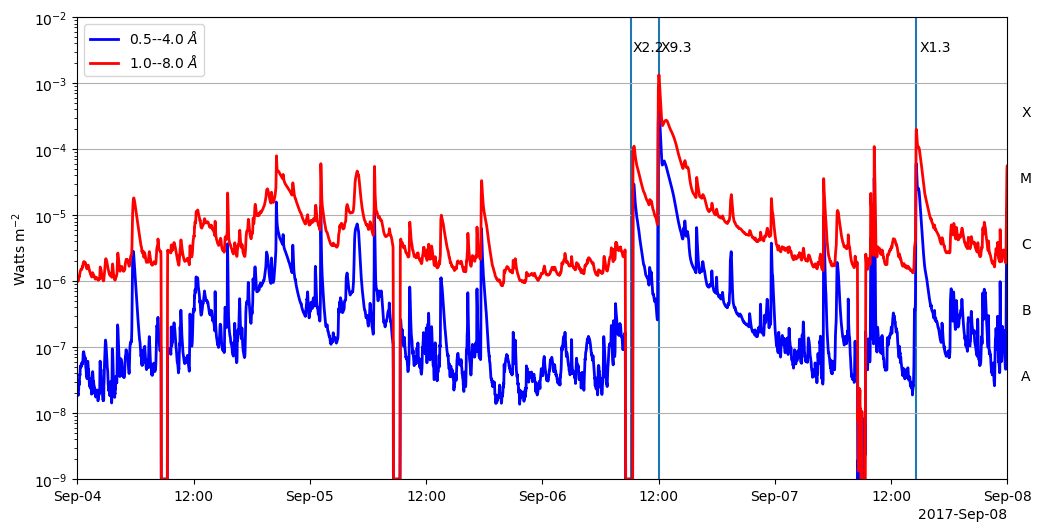

In [10]:
fig, ax = plt.subplots(figsize=(12, 6))
goes.plot(axes=ax)

labeltime = datetime.timedelta(minutes=0)

peaktime = hek_results['event_peaktime'].to_datetime()
starttime = hek_results['event_starttime'].to_datetime()
endtime = hek_results['event_endtime'].to_datetime()
goescls = hek_results['fl_goescls']

for pt, st, et, cl in zip(peaktime, starttime, endtime, goescls):
    ax.axvline(pt, linestyle='-', zorder=0)
    ax.annotate(cl, xy=(et+labeltime, 3e-3))
    ax.legend(loc=2)
    ax.set_yscale('log')
ax.set_xlim(tr.start.to_datetime(), tr.end.to_datetime())
plt.show()

In [11]:
hek_results = flare_results["hek"]["event_starttime", "event_peaktime",
                               "event_endtime", "fl_goescls", "ar_noaanum"]
hek_results = hek_results[hek_results["fl_goescls"] > "M1.0"]
hek_results

event_starttime,event_peaktime,event_endtime,fl_goescls,ar_noaanum
Time,Time,Time,str4,int64
2017-09-04 05:36:00.000,2017-09-04 05:49:00.000,2017-09-04 06:05:00.000,M1.2,12673
2017-09-04 15:11:00.000,2017-09-04 15:30:00.000,2017-09-04 15:33:00.000,M1.5,12673
2017-09-04 18:46:00.000,2017-09-04 19:37:00.000,2017-09-04 19:52:00.000,M1.7,12673
2017-09-04 19:59:00.000,2017-09-04 20:02:00.000,2017-09-04 20:06:00.000,M1.5,12673
2017-09-04 20:28:00.000,2017-09-04 20:33:00.000,2017-09-04 20:37:00.000,M5.5,12673
2017-09-04 22:10:00.000,2017-09-04 22:14:00.000,2017-09-04 22:19:00.000,M2.1,12673
2017-09-05 01:03:00.000,2017-09-05 01:08:00.000,2017-09-05 01:11:00.000,M4.2,12673
2017-09-05 04:33:00.000,2017-09-05 04:53:00.000,2017-09-05 05:07:00.000,M3.2,12673
2017-09-05 06:33:00.000,2017-09-05 06:40:00.000,2017-09-05 06:43:00.000,M3.8,12673


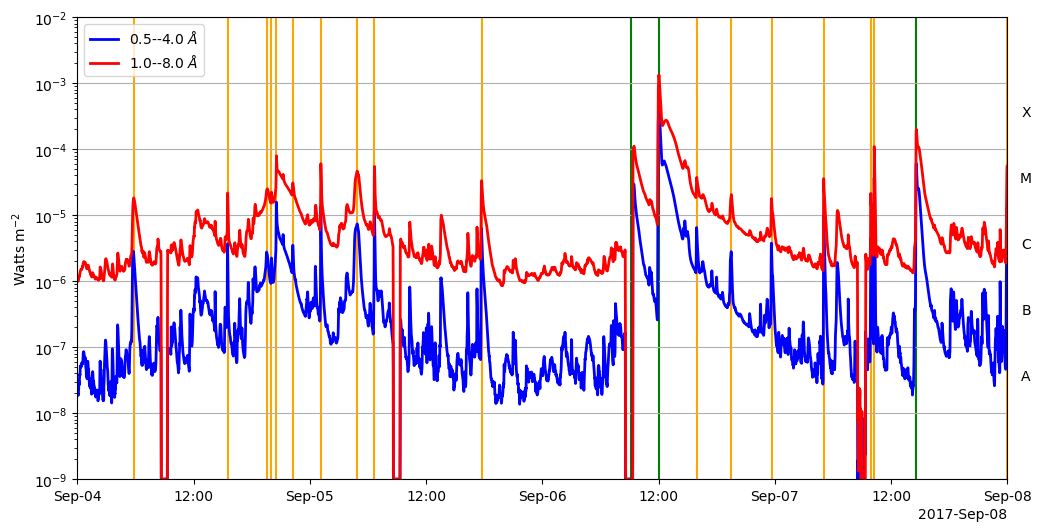

In [14]:
fig, ax = plt.subplots(figsize=(12, 6))
goes.plot(axes=ax)

labeltime = datetime.timedelta(minutes=0)

peaktime = hek_results['event_peaktime'].to_datetime()
starttime = hek_results['event_starttime'].to_datetime()
endtime = hek_results['event_endtime'].to_datetime()
goescls = hek_results['fl_goescls']

for pt, st, et, cl in zip(peaktime, starttime, endtime, goescls):
    if cl[0] == "X":
        color = 'green'
    elif cl[0] == "M":
        color = 'orange'
    ax.axvline(pt, linestyle='-', color=color, zorder=0)
    # ax.annotate(cl[0], xy=(et+labeltime, 3e-3))
    ax.legend(loc=2)
    ax.set_yscale('log')
ax.set_xlim(tr.start.to_datetime(), tr.end.to_datetime())
plt.show()